In [1]:
# Importando bibliotecas e a base para manipulação
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv("../data/low_popularity_spotify_data.csv", sep=',',  encoding='utf-8')
df.head()

,time_signature,track_popularity,speechiness,danceability,playlist_name,track_artist,duration_ms,energy,playlist_genre,playlist_subgenre,...,track_album_id,playlist_id,track_id,valence,key,tempo,loudness,acousticness,liveness,track_album_name
0,4.0,23,0.0393,0.636,Rock Classics,Creedence Clearwater Revival,138053.0,0.746,rock,classic,...,4A8gFwqd9jTtnsNwUu3OQx,37i9dQZF1DWXRqgorJj26U,5e6x5YRnMJIKvYpZxLqdpH,0.432,0.0,132.310,-3.785,0.0648,0.1730,The Long Road Home - The Ultimate John Fogerty...
1,4.0,53,0.0317,0.572,Rock Classics,Van Halen,241600.0,0.835,rock,classic,...,2c965LEDRNrXXCeBOAAwns,37i9dQZF1DWXRqgorJj26U,5FqYA8KfiwsQvyBI4IamnY,0.795,0.0,129.981,-6.219,0.1710,0.0702,The Collection
2,4.0,55,0.0454,0.591,Rock Classics,Stevie Nicks,329413.0,0.804,rock,classic,...,3S404OgKoVQSJ3xXrDVlp8,37i9dQZF1DWXRqgorJj26U,5LNiqEqpDc8TuqPy79kDBu,0.658,0.0,111.457,-7.299,0.3270,0.0818,Bella Donna (Deluxe Edition)
3,4.0,64,0.1010,0.443,Jazz Classics,"Ella Fitzgerald, Louis Armstrong",185160.0,0.104,jazz,classic,...,1y5KGkUKO0NG32MhIIagCA,37i9dQZF1DXbITWG1ZJKYt,78MI7mu1LV1k4IA2HzKmHe,0.394,0.0,76.474,-17.042,0.9130,0.1910,"Love, Ella"
4,4.0,62,0.0298,0.685,Jazz Classics,Galt MacDermot,205720.0,0.472,jazz,classic,...,6f4b9wVTkKAf096k4XG6x5,37i9dQZF1DXbITWG1ZJKYt,6MN6yRVriszuyAVlyF8ndB,0.475,9.0,80.487,-9.691,0.7850,0.2240,Shapes of Rhythm/Woman Is Sweeter


In [62]:
data = {}
for column_name in df:
    data[column_name] = {
        "type": df[column_name].dtype,
        "null_count": df[column_name].isnull().sum()
    }

info_df = pd.DataFrame(data)
info_df
df = df.dropna(how='any',axis=0) 

In [44]:
columns_to_remove = ["track_href", "track_album_name", "playlist_name", "analysis_url", "track_id", "track_album_id", "playlist_subgenre", "key"]
for column_name in columns_to_remove:
    if(column_name in df): del df[column_name]

In [63]:
row_count, column_count = df.shape
print(f"A base de dados possui {row_count} linhas e {column_count} colunas")
for column_name in df:
    column_data = df[column_name]
    column_type = column_data.dtype
    print(f"---------\n'{column_name}' ({column_type})")
    data_example = ""
    if column_type in ["int64", "float64"]: data_example = f"\t- Média: {round(column_data.mean(), 2)}\n\t- Mediana: {round(column_data.median(), 2)}\n\t- Valor Mínimo: {round(column_data.min(), 3)}\n\t- Valor Máximo: {round(column_data.max(), 3)}"
    else: data_example = f"Valores: {column_data[0]}"

    print(data_example)

A base de dados possui 3144 linhas e 29 colunas
---------
'time_signature' (float64)
	- Média: 3.93
	- Mediana: 4.0
	- Valor Mínimo: 1.0
	- Valor Máximo: 5.0
---------
'track_popularity' (int64)
	- Média: 43.48
	- Mediana: 46.0
	- Valor Mínimo: 11
	- Valor Máximo: 68
---------
'speechiness' (float64)
	- Média: 0.1
	- Mediana: 0.06
	- Valor Mínimo: 0.022
	- Valor Máximo: 0.927
---------
'danceability' (float64)
	- Média: 0.61
	- Mediana: 0.65
	- Valor Mínimo: 0.059
	- Valor Máximo: 0.977
---------
'playlist_name' (object)
Valores: Rock Classics
---------
'track_artist' (object)
Valores: Creedence Clearwater Revival
---------
'duration_ms' (float64)
	- Média: 201640.17
	- Mediana: 184641.0
	- Valor Mínimo: 35375.0
	- Valor Máximo: 1355260.0
---------
'energy' (float64)
	- Média: 0.54
	- Mediana: 0.59
	- Valor Mínimo: 0.0
	- Valor Máximo: 0.998
---------
'playlist_genre' (object)
Valores: rock
---------
'playlist_subgenre' (object)
Valores: classic
---------
'track_href' (object)
Valores:

In [70]:
df = df.sort_values(["track_popularity"], ascending=False)
df["mode"] = df["mode"].replace({1: "major", 0: "minor"})
df["track_popularity"]

2779    68
446     68
425     68
480     68
2532    68
        ..
1196    11
2542    11
3099    11
3128    11
3113    11
Name: track_popularity, Length: 3100, dtype: int64

In [71]:
if "uri" in df: 
    df = df.drop_duplicates(subset=['uri'], keep='first').sort_values(["track_popularity"], ascending=False)
    del df["uri"] # uri só tinha utilidade para remover as duplicatas
df[["track_popularity", "track_name", "playlist_genre", "duration_ms", "energy", "tempo", "danceability", "loudness", "liveness", "valence", "speechiness", "instrumentalness", "acousticness", "mode", "time_signature"]]

,track_popularity,track_name,playlist_genre,duration_ms,energy,tempo,danceability,loudness,liveness,valence,speechiness,instrumentalness,acousticness,mode,time_signature
2779,68,Sofa King,indie,196317.0,0.898,97.021,0.565,-5.055,0.2540,0.864,0.0412,0.002960,0.004910,major,4.0
446,68,Blind,metal,258267.0,0.891,92.049,0.283,-8.165,0.1590,0.226,0.1780,0.003800,0.006780,major,4.0
425,68,OZEBA,afrobeats,137684.0,0.841,147.989,0.754,-4.563,0.0903,0.838,0.0921,0.000000,0.136000,major,4.0
480,68,Dear Mama,hip-hop,280000.0,0.540,84.115,0.773,-7.123,0.1310,0.322,0.1030,0.000000,0.371000,major,4.0
2532,68,Fotografía,rock,238133.0,0.715,84.098,0.487,-4.417,0.1950,0.638,0.0519,0.000000,0.294000,major,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,11,Covered By The Clouds,electronic,199063.0,0.647,130.005,0.711,-8.589,0.0946,0.453,0.0305,0.022800,0.733000,major,4.0
2542,11,Half Breed - Remix,world,286695.0,0.831,125.012,0.844,-5.561,0.2000,0.698,0.2620,0.000120,0.006880,major,4.0
3099,11,Distant,pop,148690.0,0.732,154.999,0.644,-5.214,0.1060,0.696,0.0419,0.000003,0.120000,major,4.0
3128,11,Blue Flag / Fun Things,pop,216799.0,0.544,80.989,0.729,-8.003,0.2220,0.701,0.1050,0.000000,0.171000,major,4.0


[Text(0.5, 1.0, 'Matriz de Correlação (músicas com baixa popularidade)')]

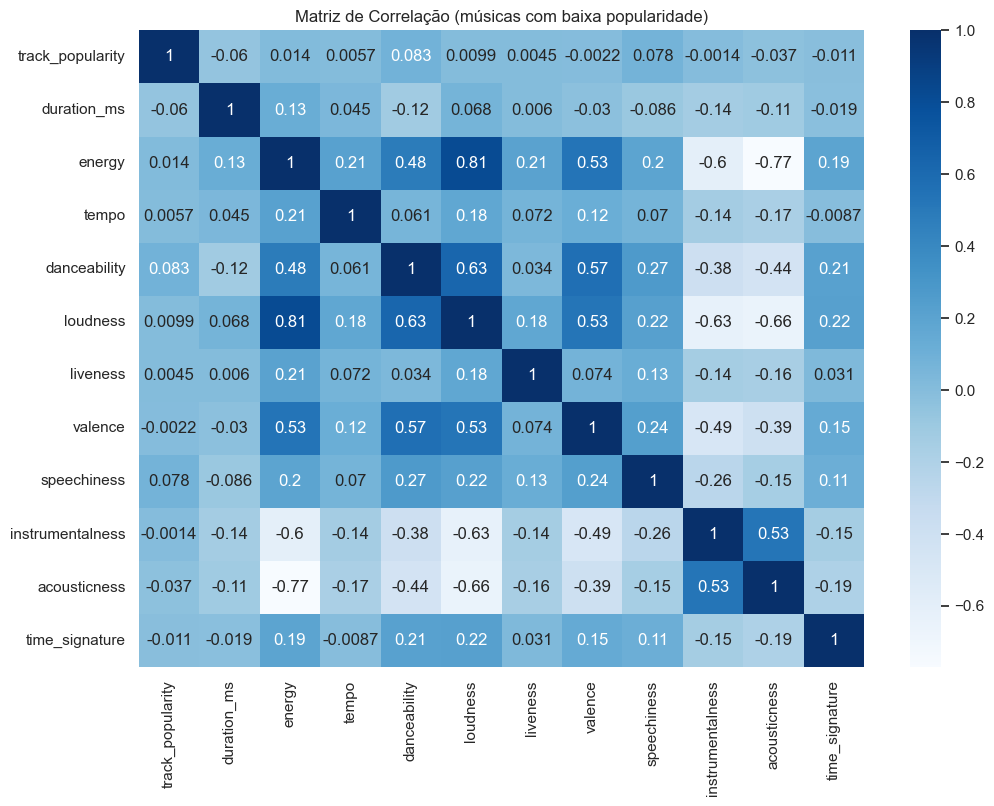

In [105]:
correlation_data = df[["track_popularity", "duration_ms", "energy", "tempo", "danceability", "loudness", "liveness", "valence", "speechiness", "instrumentalness", "acousticness", "time_signature"]].corr()
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(correlation_data, cmap="Blues", annot=True).set(title="Matriz de Correlação (músicas com baixa popularidade)")

[Text(0.5, 1.0, 'Matriz de Correlação (30 Músicas - populares)')]

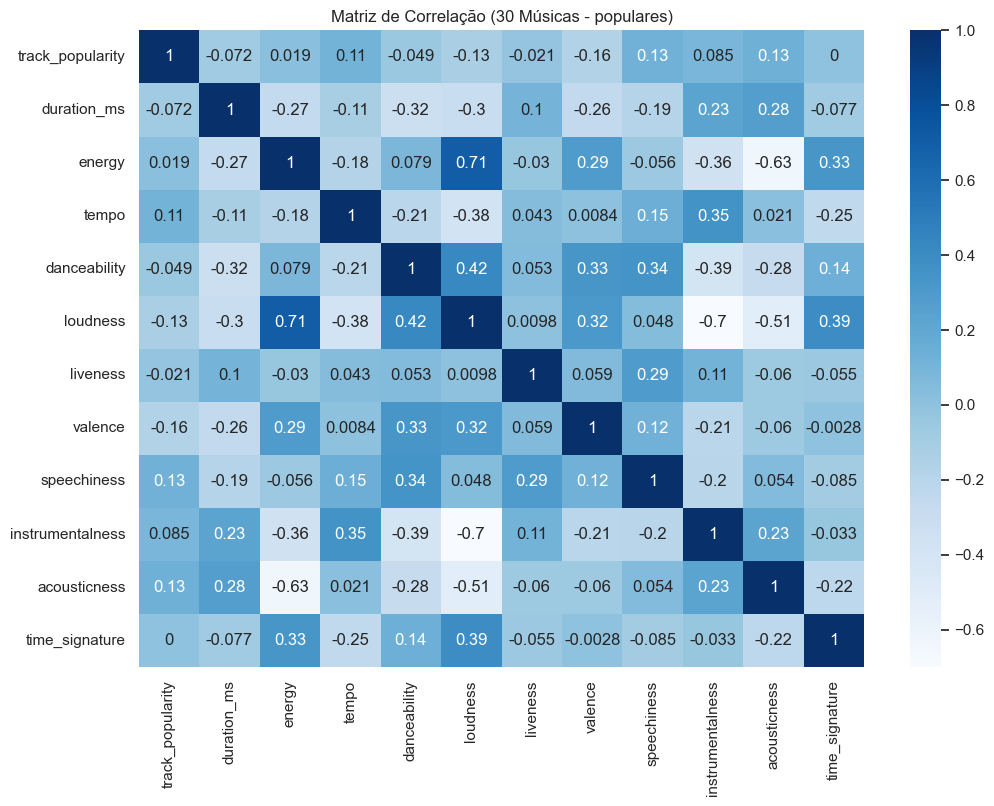

In [104]:
correlation_data = df[["track_popularity", "duration_ms", "energy", "tempo", "danceability", "loudness", "liveness", "valence", "speechiness", "instrumentalness", "acousticness", "time_signature"]].head(50).corr()
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(correlation_data, cmap="Blues", annot=True).set(title="Matriz de Correlação (30 Músicas - populares)")

In [10]:
df["playlist_genre"].value_counts()

playlist_genre
electronic    440
lofi          296
ambient       282
latin         241
world         224
hip-hop       168
pop           158
arabic        151
jazz          145
brazilian     134
rock          108
classical     107
wellness       80
turkish        64
afrobeats      56
indian         48
blues          43
soul           42
folk           35
gospel         34
gaming         33
funk           28
cantopop       27
korean         26
punk           23
reggae         19
soca           14
mandopop       14
indie          13
metal          13
j-pop          12
disco           9
country         8
k-pop           6
Name: count, dtype: int64

<Axes: title={'center': '1483 músicas contabilizadas'}, ylabel='count'>

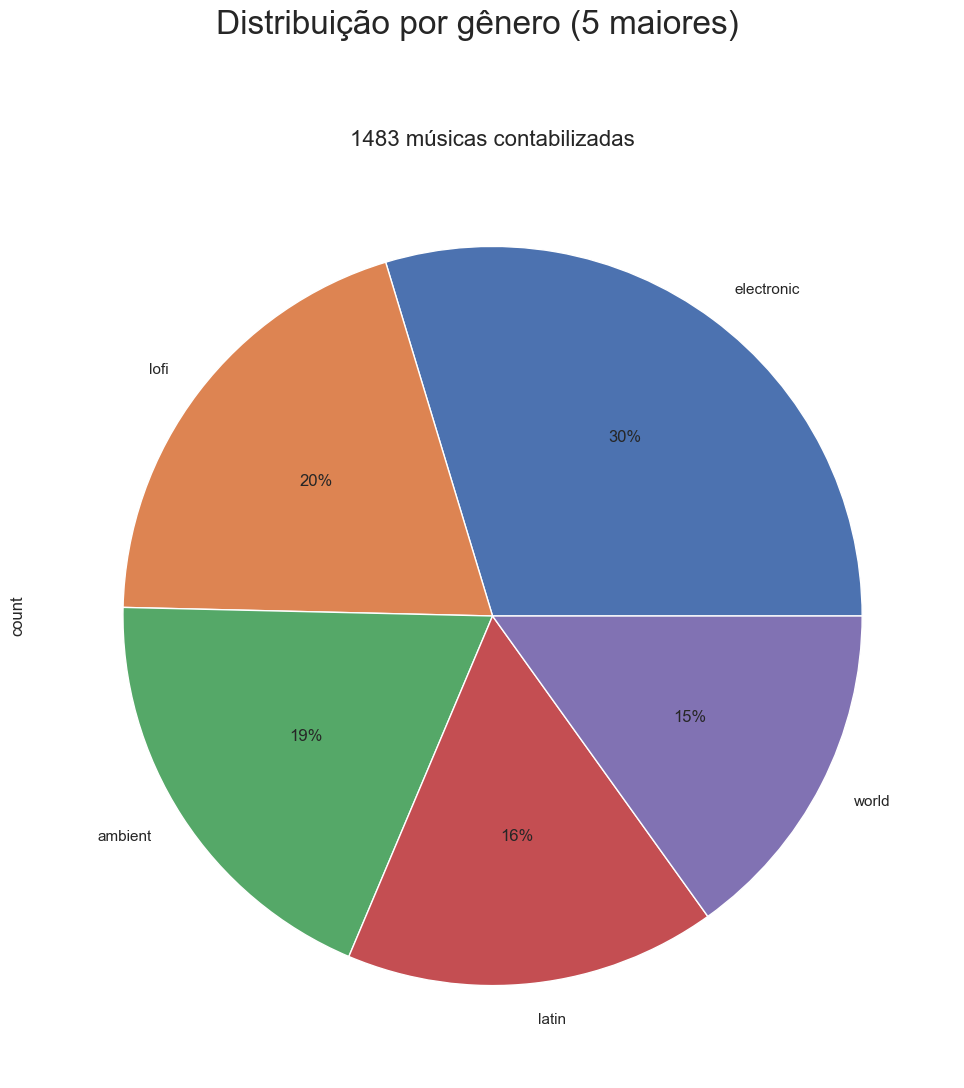

In [11]:
LIMITE = 40
genre_row_count = df["playlist_genre"].value_counts()
plt.suptitle(f"Distribuição por gênero (5 maiores)", fontsize=24, y=1)
plt.title(f"{genre_row_count.head(5).sum()} músicas contabilizadas", fontsize=16)
genre_row_count.head(5).plot.pie(figsize=(12, 12), autopct='%1.0f%%')

<Axes: title={'center': 'Distribuição por gênero (3101 músicas contabilizadas)'}, ylabel='count'>

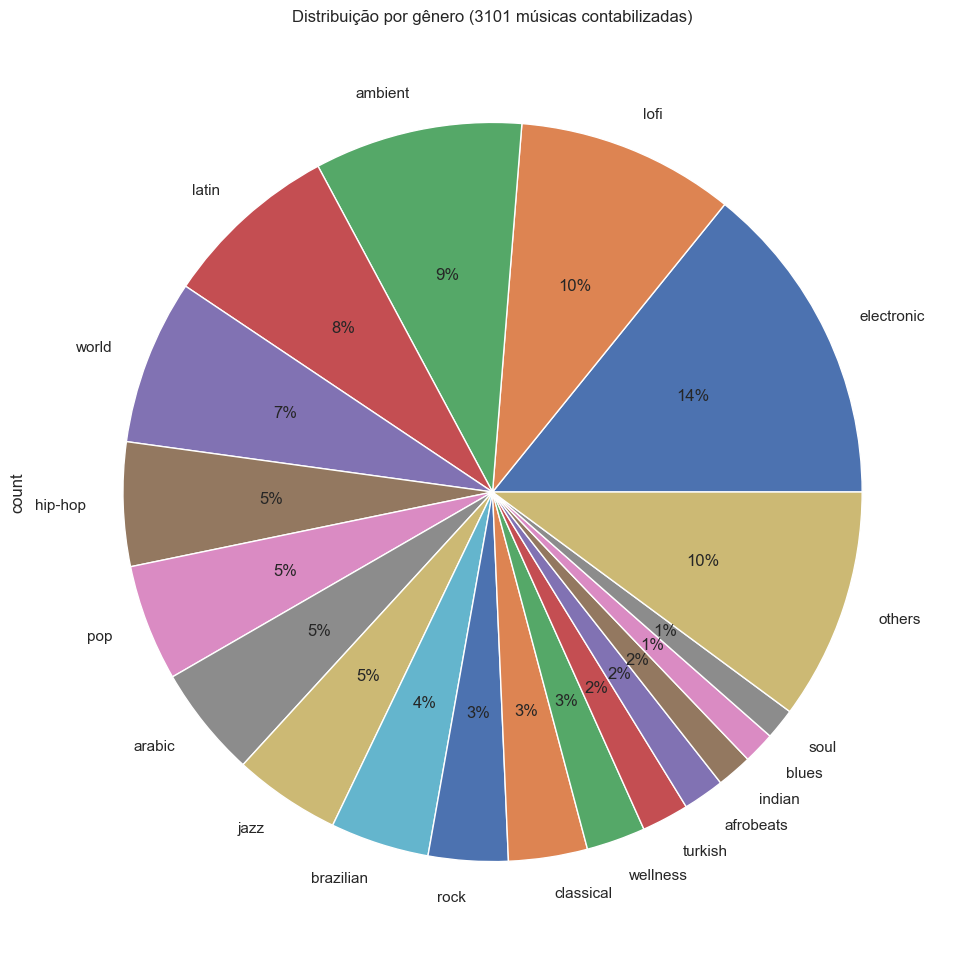

In [12]:
genre_row_count_aggregated = genre_row_count[genre_row_count >= LIMITE].copy()
genre_row_count_aggregated["others"] = genre_row_count[genre_row_count < LIMITE].sum()

plt.title(f"Distribuição por gênero ({genre_row_count_aggregated.sum()} músicas contabilizadas)")
genre_row_count_aggregated.plot.pie(figsize=(12, 12), autopct='%1.0f%%')

[Text(0.5, 1.0, 'Nº de músicas por gênero')]

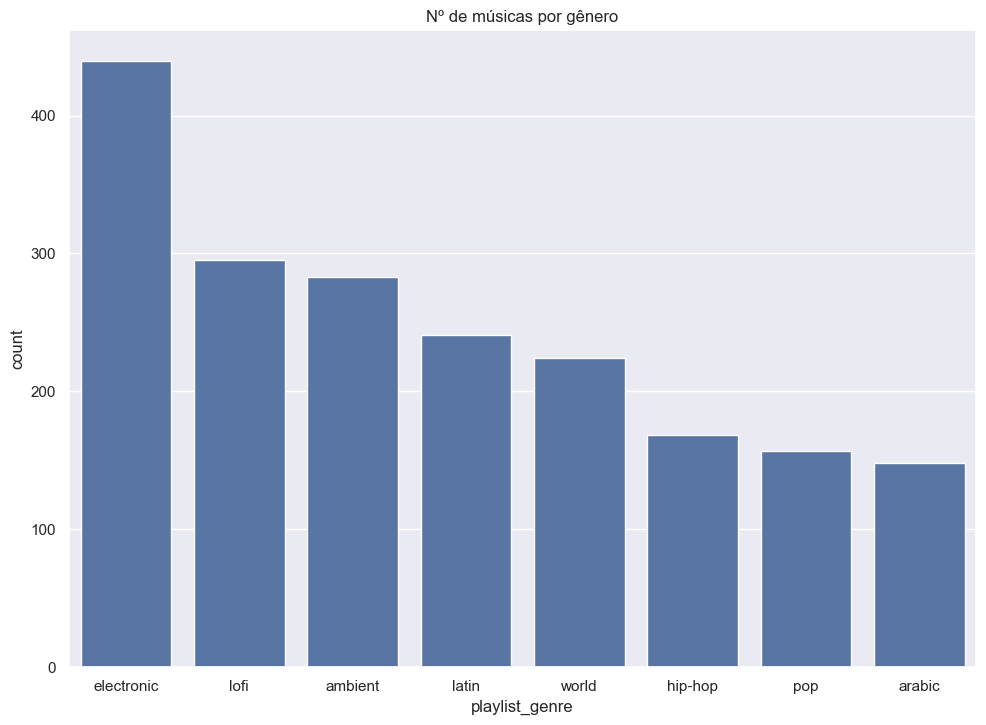

In [102]:
sns.barplot(df["playlist_genre"].value_counts().head(8)).set(title="Nº de músicas por gênero")

In [103]:
df

,time_signature,track_popularity,speechiness,danceability,playlist_name,track_artist,duration_ms,energy,playlist_genre,playlist_subgenre,...,track_album_id,playlist_id,track_id,valence,key,tempo,loudness,acousticness,liveness,track_album_name
2779,4.0,68,0.0412,0.565,Australian Indie,Royel Otis,196317.0,0.898,indie,australian,...,6qKsVbDuX5sKB4OTqkNc0C,37i9dQZF1EIcLyY4fNNQaC,25HgUJf69zb3K7TJw7LGCQ,0.864,0.0,97.021,-5.055,0.004910,0.2540,Sofa Kings
446,4.0,68,0.1780,0.283,Death Metal Essentials,Korn,258267.0,0.891,metal,death,...,7D3XFJlfZIkmGWqZXm2X8z,37i9dQZF1DWWOaP4H0w5b0,1pr9TZGOXeJUggIal1Wq3R,0.226,2.0,92.049,-8.165,0.006780,0.1590,Korn
425,4.0,68,0.0921,0.754,African Heat,Rema,137684.0,0.841,afrobeats,african,...,2DDaN7Pgx9uDPd8IbWWW9H,37i9dQZF1DWYkaDif7Ztbp,7ySC0IjVS1PMEdsZOvsUK2,0.838,2.0,147.989,-4.563,0.136000,0.0903,HEIS
480,4.0,68,0.1030,0.773,90s Hip-Hop,2Pac,280000.0,0.540,hip-hop,90s,...,3OrucS4sHv6Bl9GS4rafEk,37i9dQZF1DX186v583rmzp,6tDxrq4FxEL2q15y37tXT9,0.322,6.0,84.115,-7.123,0.371000,0.1310,Me Against The World
2532,4.0,68,0.0519,0.487,Spanish Rock Classics,"Juanes, Nelly Furtado",238133.0,0.715,rock,spanish,...,2UJCnSqpR3AIuTvWYZLCp1,4pJvzaBmfEjNSEva1k2fkD,0dEPlb8waIqRtKpLb3l6So,0.638,7.0,84.098,-4.417,0.294000,0.1950,Un Día Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,4.0,11,0.0305,0.711,Tropical House,NSH,199063.0,0.647,electronic,tropical,...,4MbWZ0QQDkQK2evqC53cUm,37i9dQZF1DX0AMssoUKCz7,3L7GfGzP8miHtSJqclIF73,0.453,10.0,130.005,-8.589,0.733000,0.0946,Covered By The Clouds
2542,4.0,11,0.2620,0.844,Indigenous Beats,DJ Shub,286695.0,0.831,world,indigenous,...,1uHMLe3DT3WTYdD98k0mGK,24xb9b1D4DUr8nUBvl01P7,7Kn6nJAsSRPyYVE5Jnu8Qq,0.698,7.0,125.012,-5.561,0.006880,0.2000,Half Breed (Remix)
3099,4.0,11,0.0419,0.644,Scandi Pop,Hanne Mjøen,148690.0,0.732,pop,scandi,...,4WTleT2EjQXLBoxMNlrroi,59z06GgF6TTDbm5cr1RZUC,1DaUB9iYlmYXK8MufhBfDN,0.696,6.0,154.999,-5.214,0.120000,0.1060,Distant
3128,4.0,11,0.1050,0.729,Scandi Pop,Jesper Jenset,216799.0,0.544,pop,scandi,...,7jmMpwSEjFUU726YzMs92H,59z06GgF6TTDbm5cr1RZUC,6VvRwqQpgWU1WclXgCOKI8,0.701,10.0,80.989,-8.003,0.171000,0.2220,Blue Flag / Fun Things
